### Why Data Visualization

* For exploratory data analysis
* Communicate Data clearly
* Share an unbiased representation of the data
* Use them to support recommendations made to stakeholders

### Some Best Practices

* Less is more effective
* Less is more attractive
* Less is more impactive

Unless additional elements help tell the story and not distract from it, they shouldn't be used

### Matplotlib Architecture

* Backend Layer
* Artist Layer - Appropriate programming paradigm for web application server or UI application (usually used by developers)
* Scripting Layer - For everyday use (lighter and is quick and easy use)

### Backend Layer
Contains three built-in abstract interface classes:
* Figure Canvas - defines and encompasses the area on which the figure is drawn
* Renderer - an instance of the renderer class knows how to draw on the figure canvas
* Event - handles user inputs like keyboars strokes and mouse clicks

### Artist Layer
Composed of one main object which is the Artist. 
* The Artist is the object that knows how to take the Renderer and use it to put ink on the canvas
* Titles, lines, tick labels and images all correspond to individual artist instances

### Plotting a histogram of 10000 random numbers using the Artist Layer

In [1]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

In [2]:
fig = Figure()
canvas = FigureCanvas(fig)

In [3]:
rand_normal = np.random.randn(10000)

In [4]:
ax = fig.add_subplot(111)

In [5]:
ax.hist(rand_normal, 100)
ax.set_title(r'Normal Distribution with $\mu=0 and \sigma=1$')
fig.savefig('matplotlib_histogram.png')

#### Displaying the saved image

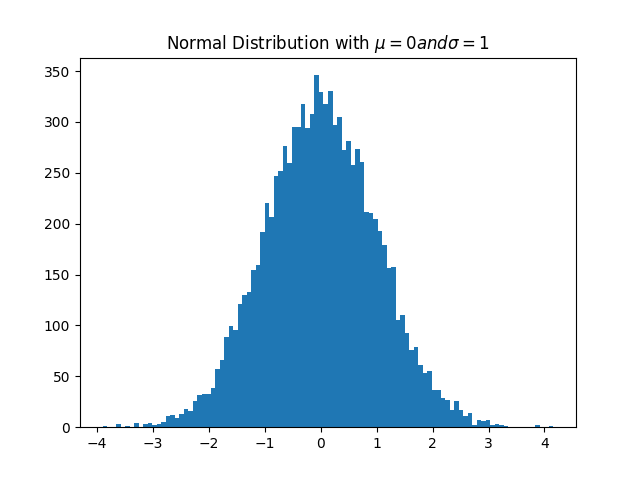

In [6]:
from IPython.display import Image
Image(filename='matplotlib_histogram.png') 

### Plotting a histogram of 10000 random numbers using the Scripting Layer

#### Matplotlib's scripting layer is essentially the Matplotlib.pyplot interface, which automates the process of defining a canvas and defining a figure artist instance and connecting them

In [7]:
from matplotlib import pyplot as plt

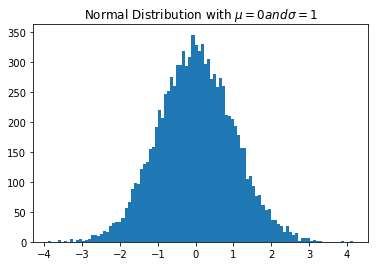

In [8]:
plt.hist(rand_normal, 100)
plt.title(r'Normal Distribution with $\mu=0 and \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

#### Matplotlib Backends
* Matplotlib has a number of backends but two famous ones used in a Jupyter Notebook are the inline and the notebook backends
* One limitation of the inline backend is that a figure cannot be modified once it's rendered. So after rendering a figure, there is no way to add, for example, a figure title or label its axes. 
* A backend that overcomes this limitation is the notebook backend. With the notebook backend in place, if a plt function is called, it checks if an active figure exists, and any functions called will be applied to this active figure. If a figure does not exist, it renders a new figure. 

In [9]:
%matplotlib notebook

#### Generating a marker using the scripting interface

<IPython.core.display.Javascript object>


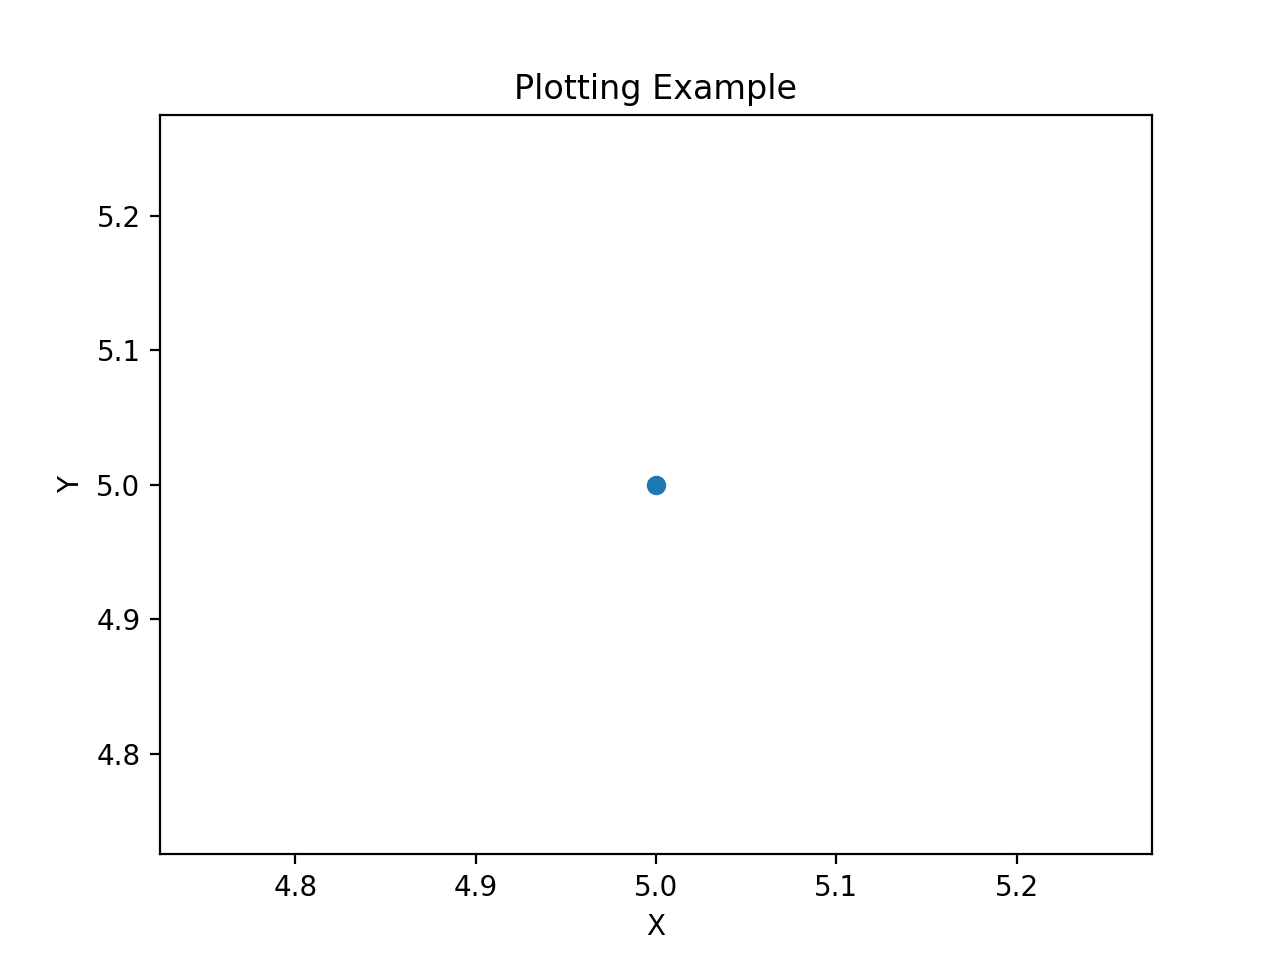

In [10]:
plt.plot(5,5, 'o')

#### Modifying the above plot after rendering it

In [11]:
plt.title('Plotting Example')
plt.xlabel('X')
plt.ylabel('Y')

Text(85.19444444444443, 0.5, 'Y')

### Dataset in use
The population division of the United Nations compiled immigration data pertaining to 45 countries. The data consist of the total number of immigrants from all over the world to each of the 45 countries as well as other metadata pertaining to the immigrants countries of origin. The dataset used for this course focuses on immigration to Canada

In [12]:
import pandas as pd

In [13]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [14]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
print('The shape of this dataset is {}'.format(df_can.shape))

The shape of this dataset is (195, 43)


Examining the data types

In [16]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

Removing unnecessary columns and renaming some columns

In [17]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename({'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, axis=1, inplace=True)

Making the country name the index for easier access and adding total migration column to contain sum of migrants from 1980 to 2012

In [18]:
df_can.set_index('Country', inplace=True)

In [19]:
# If we want to get rid of the name of the index
# df_can.index.name = None

In [20]:
df_can[:2]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


Adding a total column that sums up the total immigrants by country over the entire period 1980 - 2013

In [21]:
df_can['Total'] = df_can.sum(axis=1)

Some statistics about the data

In [22]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [23]:
# Check if all the columns are of string type
all([isinstance(col, str) for col in df_can.columns])

False

Converting integer columns (years) to string

In [24]:
df_can.columns = list(map(str, df_can.columns))

In [25]:
years = list(map(str, range(1980, 2014)))

### Making some plots from the data

In [26]:
import matplotlib as mpl

In [27]:
mpl.__version__

'3.0.3'

Available Plotting Styles in Matplotlib

In [28]:
print(plt.style.available)

['seaborn-colorblind', 'seaborn', 'fast', 'fivethirtyeight', '_classic_test', 'seaborn-muted', 'seaborn-white', 'dark_background', 'seaborn-darkgrid', 'ggplot', 'bmh', 'seaborn-talk', 'Solarize_Light2', 'seaborn-pastel', 'classic', 'tableau-colorblind10', 'seaborn-poster', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-notebook', 'grayscale', 'seaborn-bright', 'seaborn-dark', 'seaborn-paper']


### Using ggplot style for plotting

In [29]:
plt.style.use('ggplot')

### Line Plot

Usually used when depicting trends over time

Plotting the trend of Immigration to Canada from Haiti over the years

In [30]:
haiti = df_can.loc['Haiti', years]

In [31]:
%matplotlib inline

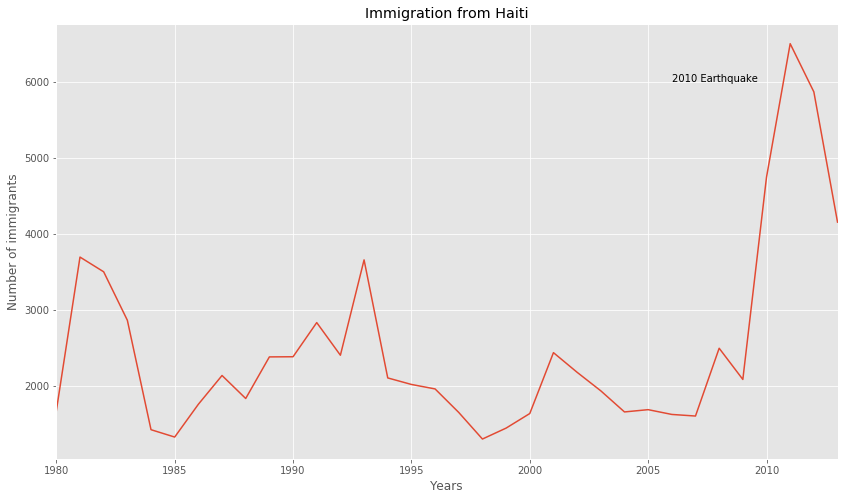

In [32]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line', figsize=(14,8))
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2006, 6000, '2010 Earthquake')
plt.show()

In [33]:
df_CI = df_can.loc[['India', 'China'], years]

In [34]:
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


**Note: pandas** plots the indices on the x-axis and the columns as individual lines on the y-axis in a line graph. So if there are multiple lines to be plotted, then each line's data should be in a column, not a row. Hence transposing the above dataframe before plotting


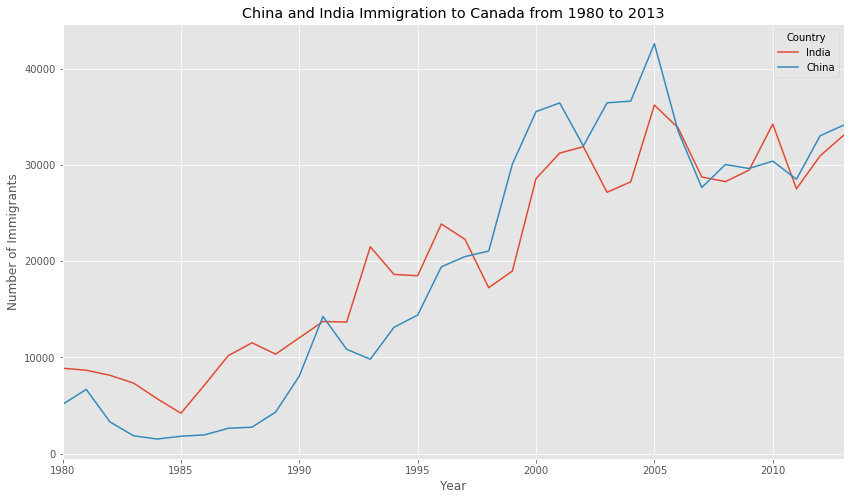

In [35]:
df_CI.T.plot(kind='line', figsize=(14,8))
plt.title('China and India Immigration to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

**Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret**

In [36]:
df_top5 = df_can.sort_values('Total', ascending=False)[:5]

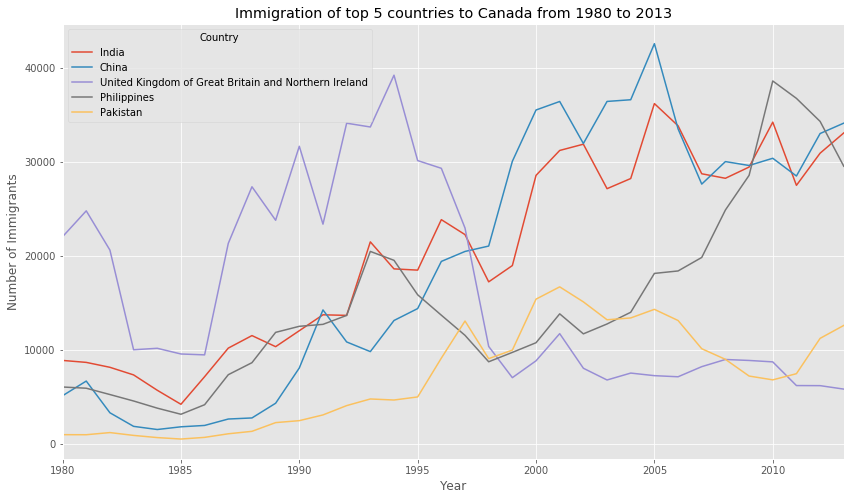

In [37]:
df_top5.loc[:,years].T.plot(kind='line', figsize=(14,8))
plt.title('Immigration of top 5 countries to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Secondary Axis for line plots

We can use the secondary axis to compare trends that are ar different levels.

Comparing the trends of immigration between India and Haiti

Without secondary axis

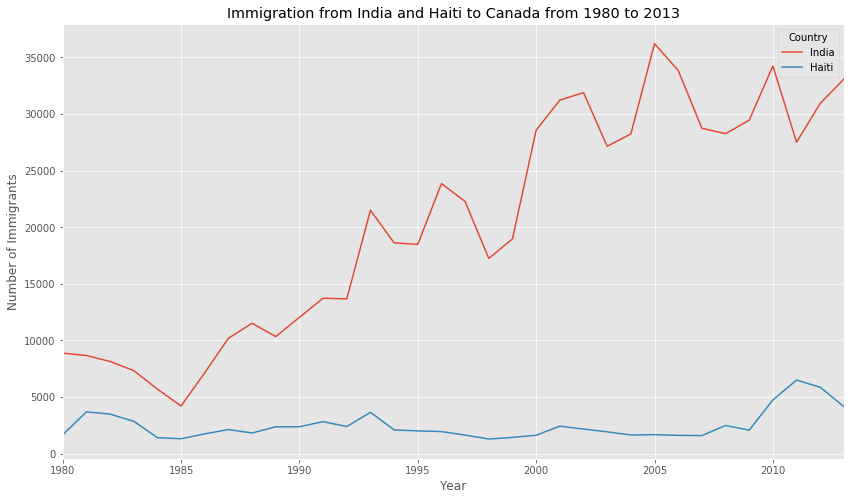

In [38]:
df_can.loc[['India', 'Haiti'], years].T.plot(kind='line', figsize=(14,8))
plt.title('Immigration from India and Haiti to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

We can see how the trend for Haiti has been compressed. Let's try with the secondary axis

With Secondary Axis

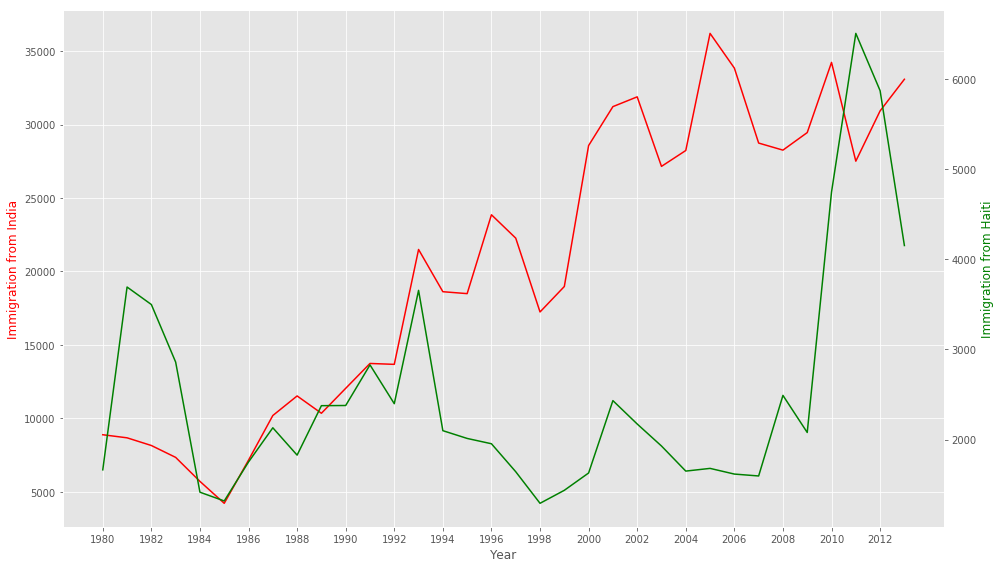

In [39]:
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.plot(df_can.loc['India', years], color='r', label='India')
ax1.set_ylabel('Immigration from India', color='r')
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
ax2.plot(df_can.loc['Haiti', years], color='g', label='Haiti')
ax2.set_ylabel('Immigration from Haiti', color='g')
ax2.grid(False)
plt.xticks(years[::2])

fig.tight_layout()
plt.show()

Now we see the trend of immigration from Haiti more clearly

### Area Plot
Also known as **stacked line plot**, an area plot is a type of plot that depicts accumulated totals using numbers or percentages over time. It is based on the line plot and is commonly used when trying to compare two or more quantities.

Generating area plot for the top 5 countries

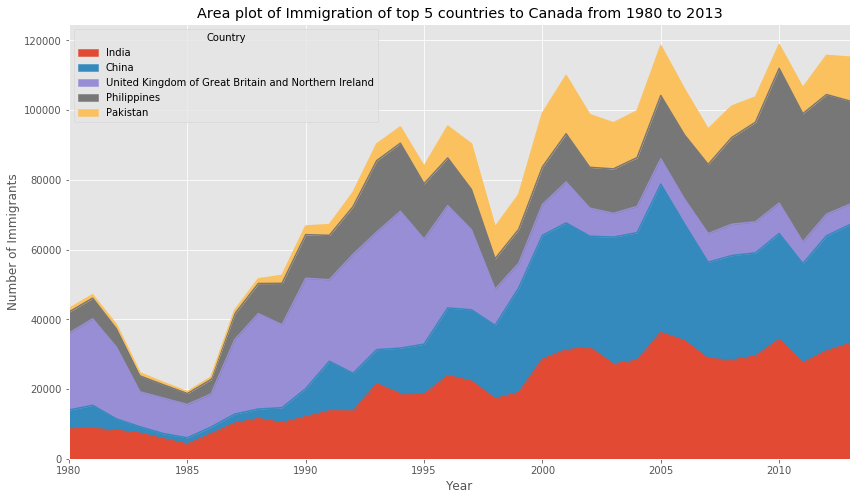

In [40]:
df_top5.loc[:,years].T.plot(kind='area', figsize=(14,8))
plt.title('Area plot of Immigration of top 5 countries to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

The area plot indicates the below while the line plot directly does not
* The time trend of cumulative immigration to Canada from the top 5 countries
* Visual share of the immigration for each year coming from each of the top 5 countries

#### The area plot can also be plotted unstacked using the stacked parameter and the transparecny cand be modified from the default value of 0.5 using the alpha parameter

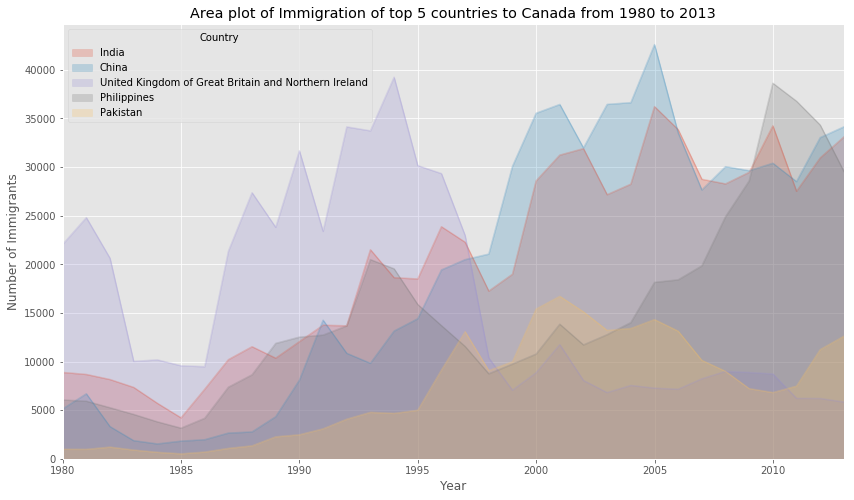

In [41]:
df_top5.loc[:,years].T.plot(kind='area', figsize=(14,8), stacked=False, alpha=0.25)
plt.title('Area plot of Immigration of top 5 countries to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

#### We can also use the artist layer to create the same plot. Using the artist layer provides us additional flexibility (not in this case) but in more advanced visualizations

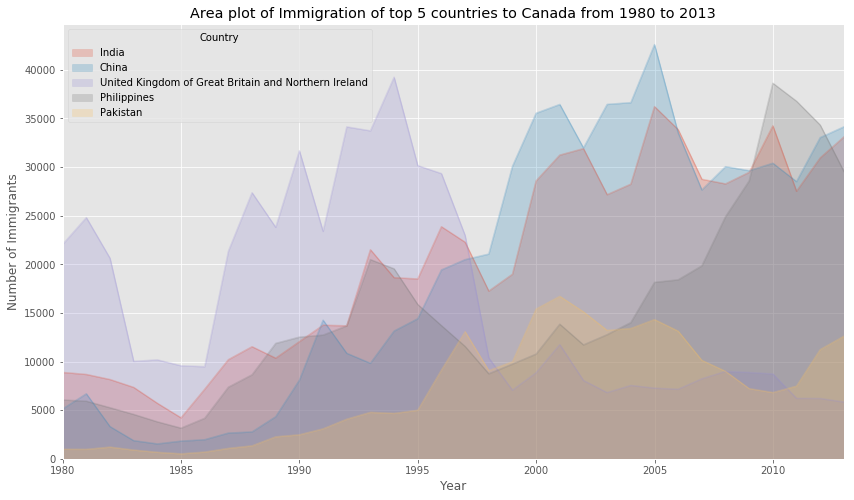

In [42]:
ax = df_top5.loc[:,years].T.plot(kind='area', figsize=(14,8), alpha=0.25, stacked=False)
ax.set_title('Area plot of Immigration of top 5 countries to Canada from 1980 to 2013')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')
plt.show()

### Histogram
A way of representing the frequency distribution of a numeric dataset. It partitions the datapoints into bins and counts the number of datapoints assigned to each bin

Visualizing the distribution of immigrants to Canada in 2013

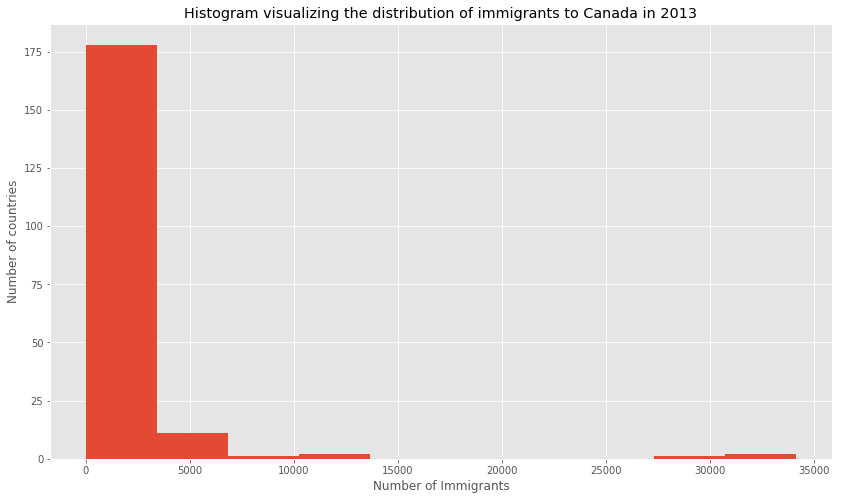

In [43]:
df_can['2013'].plot(kind='hist', figsize=(14,8))
plt.title('Histogram visualizing the distribution of immigrants to Canada in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of countries')
plt.show()

The bins are not aligned with the tick marks on the horizonal axis. So we need to fix it - we will use numpy to do that

In [44]:
count, edges = np.histogram(df_can['2013'])

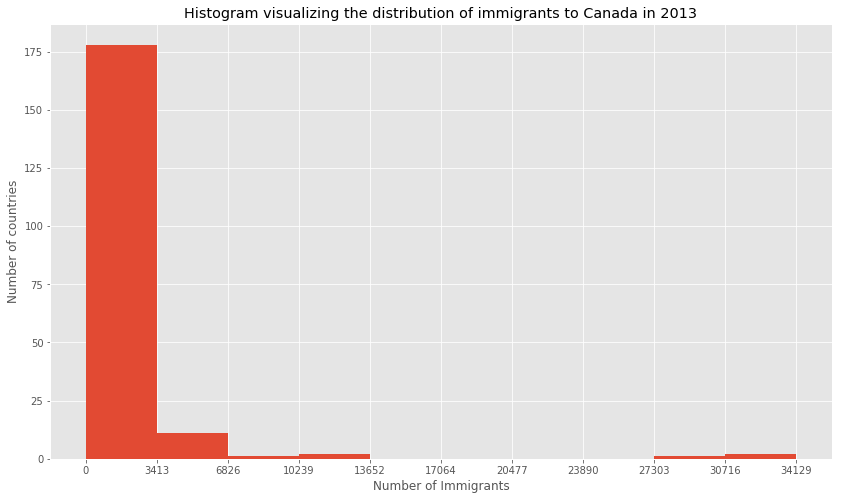

In [45]:
df_can['2013'].plot(kind='hist', figsize=(14,8), xticks=edges)
plt.title('Histogram visualizing the distribution of immigrants to Canada in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of countries')
plt.show()

The bin edges are now aligned with the tick marks on the horizontal axis

**We can also plot multiple histograms in the same plot** <br>
Let's plot the histogram of immigration from India and Philippines from 1980 to 2013

In [46]:
I_P = df_can.loc[['India', 'Philippines'],years].T

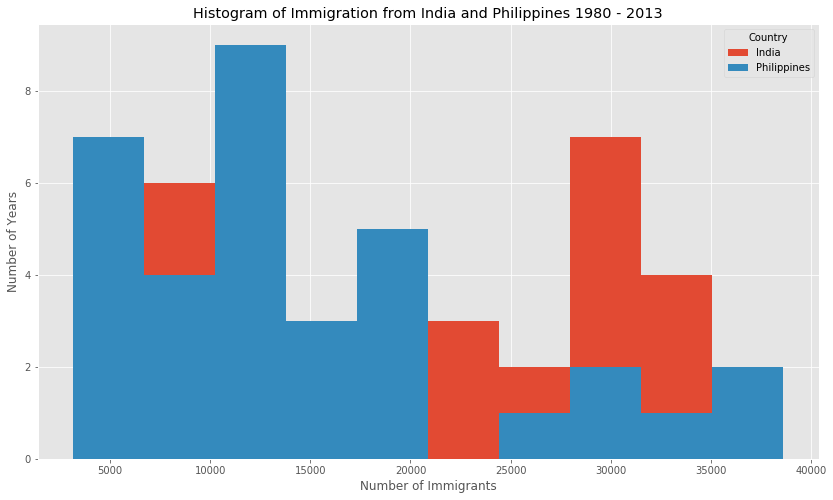

In [47]:
I_P.plot(kind='hist', figsize=(14,8))
plt.title('Histogram of Immigration from India and Philippines 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

We can make the plot better by making some adjustments

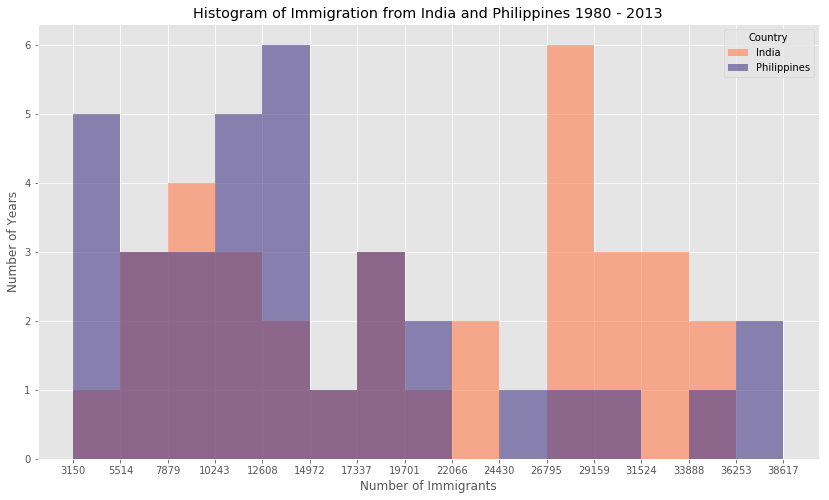

In [48]:
count, edges = np.histogram(I_P, 15)
I_P.plot(kind='hist', bins=15, figsize=(14,8), xticks=edges, alpha=0.6, color=['coral', 'darkslateblue'])
plt.title('Histogram of Immigration from India and Philippines 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

This plot lets us compare the histograms across the two countries. There are better ways to compare the data distribution like using a boxplot - we will look at this later in the notebook

We can get the list of colors available in Matplotlib by running the below. Just printing 10 for now

In [49]:
import matplotlib
ctr = 0
for name, hex in matplotlib.colors.cnames.items():
    if ctr<11:
        print(name, hex)
        ctr += 1

burlywood #DEB887
black #000000
yellowgreen #9ACD32
lightsalmon #FFA07A
seashell #FFF5EE
mediumspringgreen #00FA9A
darkviolet #9400D3
lightblue #ADD8E6
dodgerblue #1E90FF
magenta #FF00FF
rosybrown #BC8F8F


### Bar Chart
Unlike a histogram, a bar chart is a type of plot where the length of each bar is proportional to the value of the item that it represents. It is commonly used to compare the values of a variable at a given point in time.

Plotting immigration from Iceland to Canada from 1980 to 2013

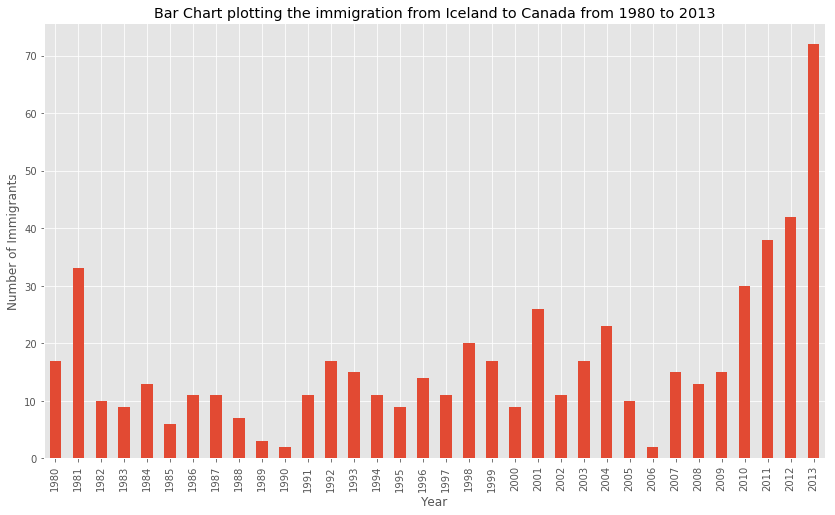

In [50]:
df_can.loc['Iceland', years].plot(kind='bar', figsize=(14,8))
plt.title('Bar Chart plotting the immigration from Iceland to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

There was an economic crisis in Iceland from 2008 to 2011 and we see that the immigration trend is increasing rapidly starting 2018. Let's annotate this on the graph

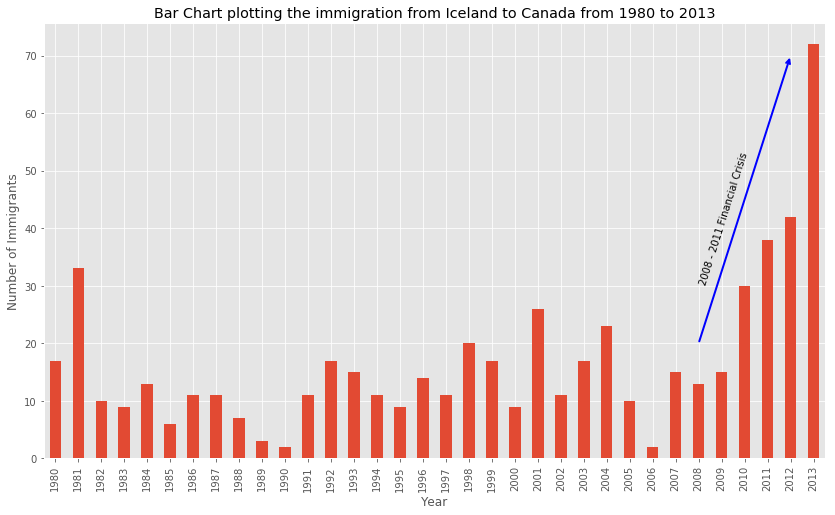

In [51]:
df_can.loc['Iceland', years].plot(kind='bar', figsize=(14,8))
plt.title('Bar Chart plotting the immigration from Iceland to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

#### Using a horizontal bar chart

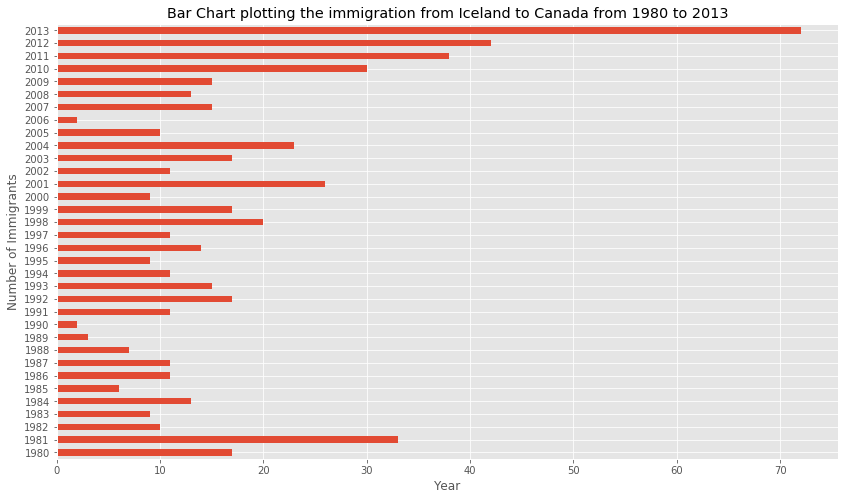

In [52]:
df_can.loc['Iceland', years].plot(kind='barh', figsize=(14,8))
plt.title('Bar Chart plotting the immigration from Iceland to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Pie Chart

Usually used to indicate category level breakup (proportions) of the total

In [53]:
df_continents = df_can.groupby('Continent').sum()

Plot the total immigration (from 2980 to 2013) to Canada by continent

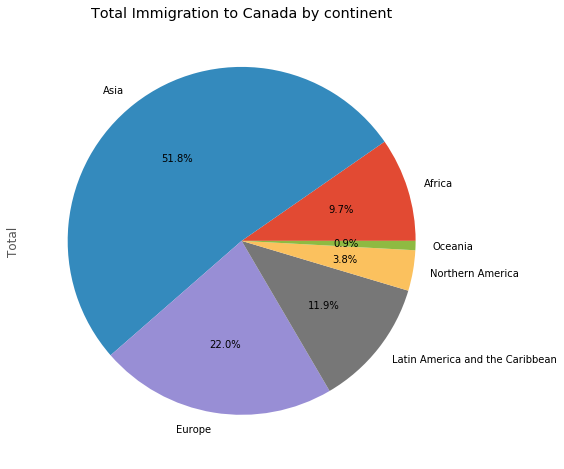

In [54]:
df_continents['Total'].plot(kind='pie', figsize=(14,8), autopct='%1.1f%%')
plt.title('Total Immigration to Canada by continent')
plt.show()

Making the pie chart look better and also using other colors

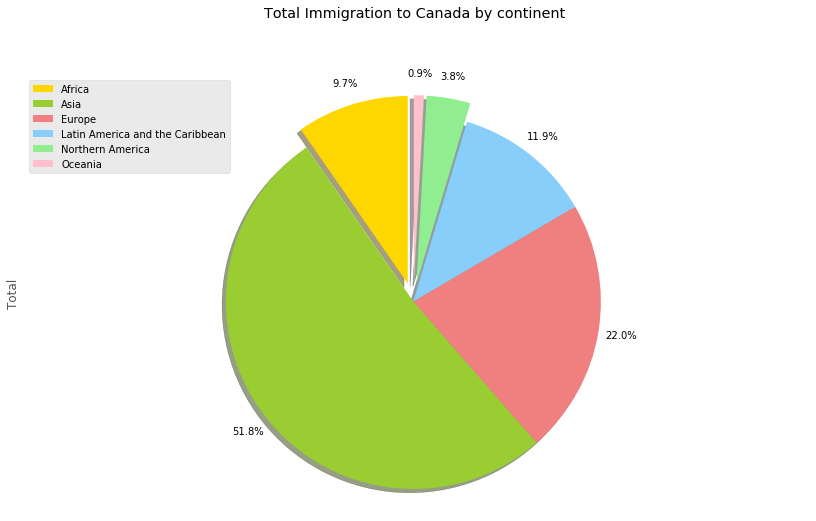

In [55]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

df_continents['Total'].plot(kind='pie', figsize=(14, 8), autopct='%1.1f%%', startangle=90,    
                            shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)

# Pushing the title up so it doesn't clash with the percentages
plt.title('Total Immigration to Canada by continent', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### Box Plot

A box plot is a way of statistically representing the distribution of given data through five main dimensions. The five dimesions are the minimum, first quartile (25th percentile), median, third quartile (75th percentile) and maximum. Outliers can also be added to the plot.

Box Plots can generally be used to understand the spread of the data and compare multiple fields

Plotting Immigration from Japan to Canada from 1980 to 2013

In [56]:
df_japan = df_can.loc['Japan', years]

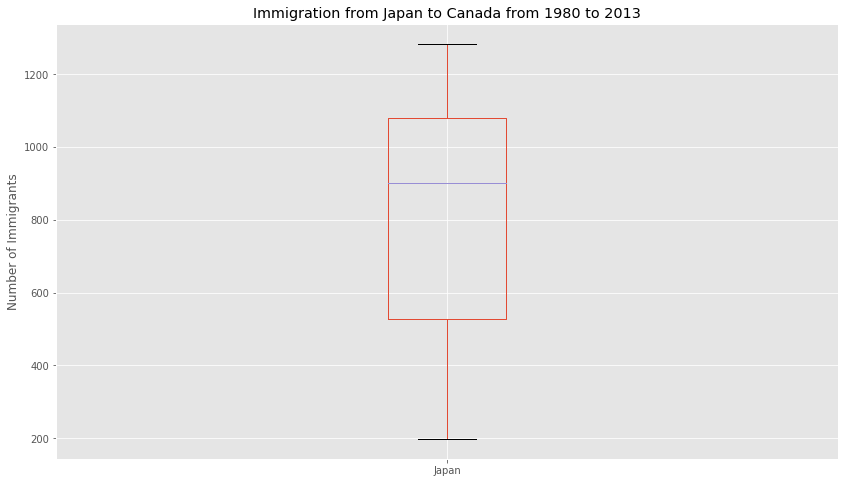

In [57]:
df_japan.plot(kind='box', figsize=(14,8))
plt.title('Immigration from Japan to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.show()

Comparing the data distribution of India and China

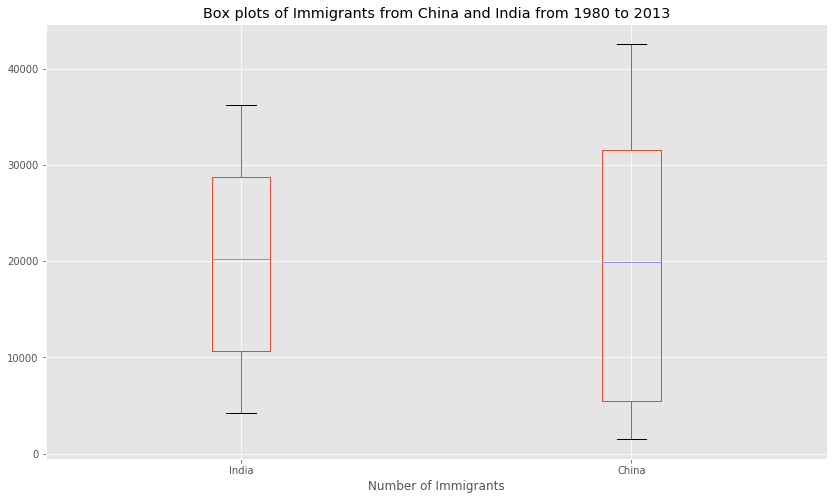

In [58]:
df_CI.T.plot(kind='box', figsize=(14,8))
plt.title('Box plots of Immigrants from China and India from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.show()

Plotting horizontal box plots

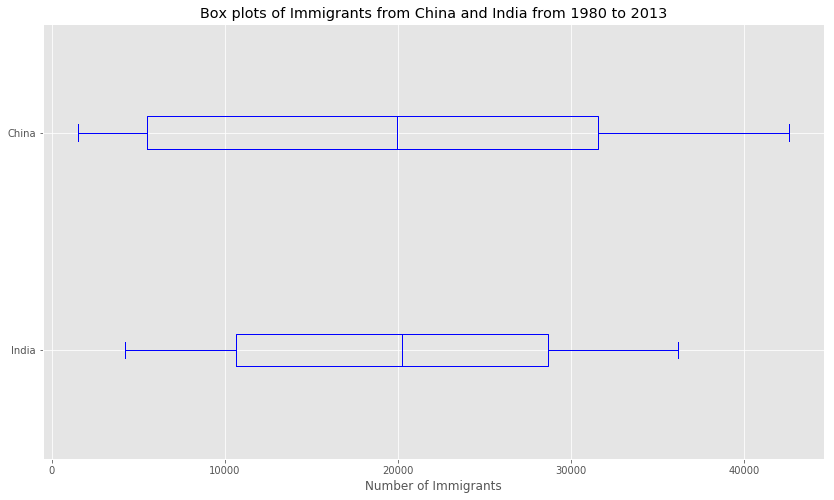

In [59]:
df_CI.T.plot(kind='box', figsize=(14,8), vert=False, color='blue')
plt.title('Box plots of Immigrants from China and India from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.show()

Using a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* 1980s, 1990s, and 2000s.

In [60]:
### type your answer here
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

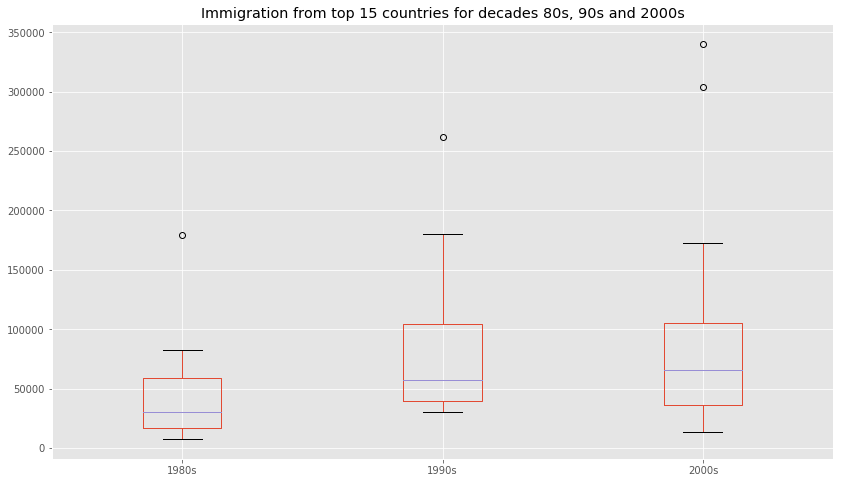

In [61]:
new_df.plot(kind='box', figsize=(14, 8))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

We can see that the boxplot is identifying the outliers in the plot. Outliers are identified as values that 
* larger than Q3 (75th percentile) by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 (25th percentile) by at least 1.5 times the IQR.

where IQR is Q3 - Q1

### Scatter Plot

It is a type of plot that displays variables pertaining to typically two variables against each other. It is usually used to plot a dependent variable against an independent variable to visually examine any relationships that may exist

Scatter plot of total annual immigration to Canada from 1980 to 2013

In [62]:
df_total = df_can.loc[:,years].sum(axis=0)
df_total = df_total.reset_index()
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype('int')

Unlike some of the other plots, the kind parameter alone is not enough to make the scatter plot. The x and y parameters are also required.

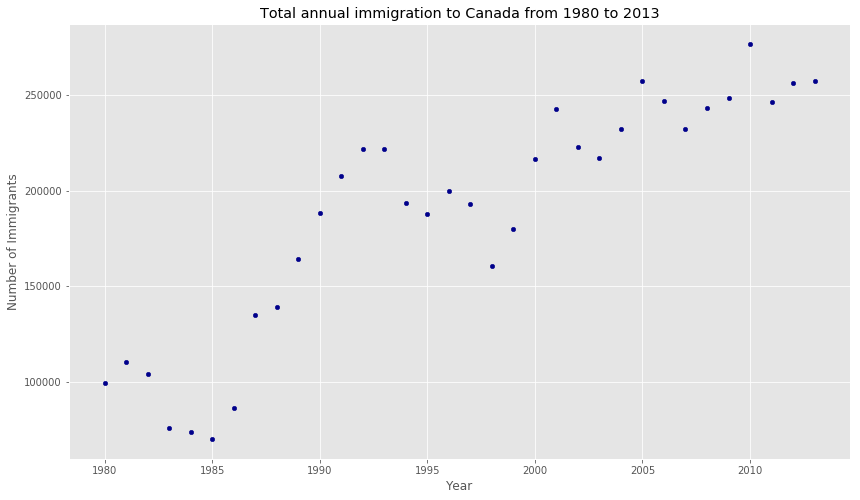

In [63]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(14,8), color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Total annual immigration to Canada from 1980 to 2013')
plt.show()

We can add a line of best fit to the plot

In [64]:
fit = np.polyfit(df_total['year'], df_total['total'], deg=1)

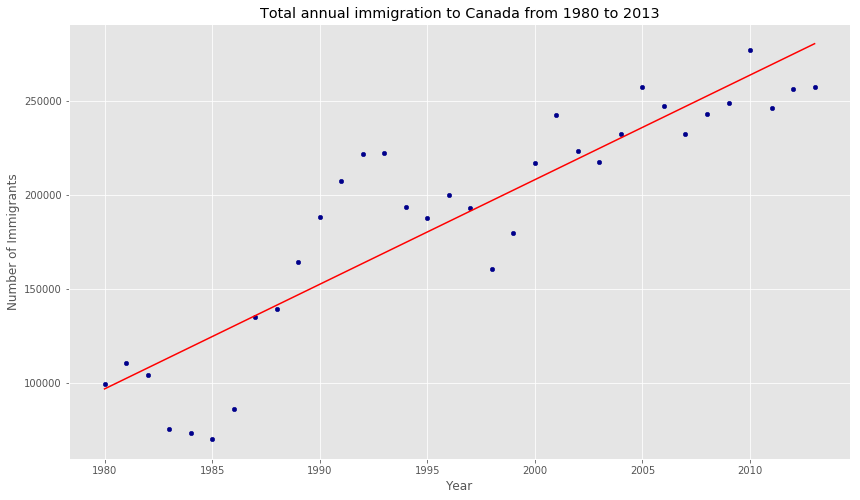

In [65]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(14,8), color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Total annual immigration to Canada from 1980 to 2013')
plt.plot(df_total['year'], fit[0] * df_total['year'] + fit[1], color='red')
plt.show()

## Seaborn Library

Seaborn is a great library to make attractive plots in a very easy way

In [66]:
import seaborn as sns

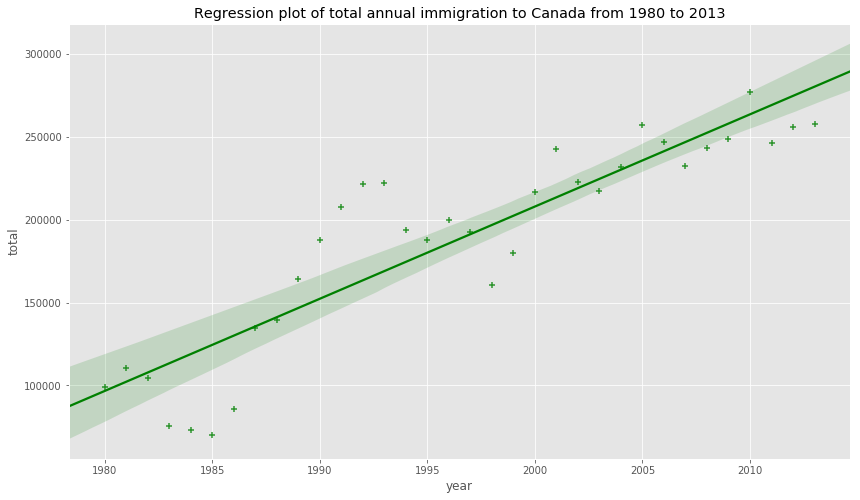

In [67]:
plt.figure(figsize=(14,8))
sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')
plt.title('Regression plot of total annual immigration to Canada from 1980 to 2013')
plt.show()

Making some improvements

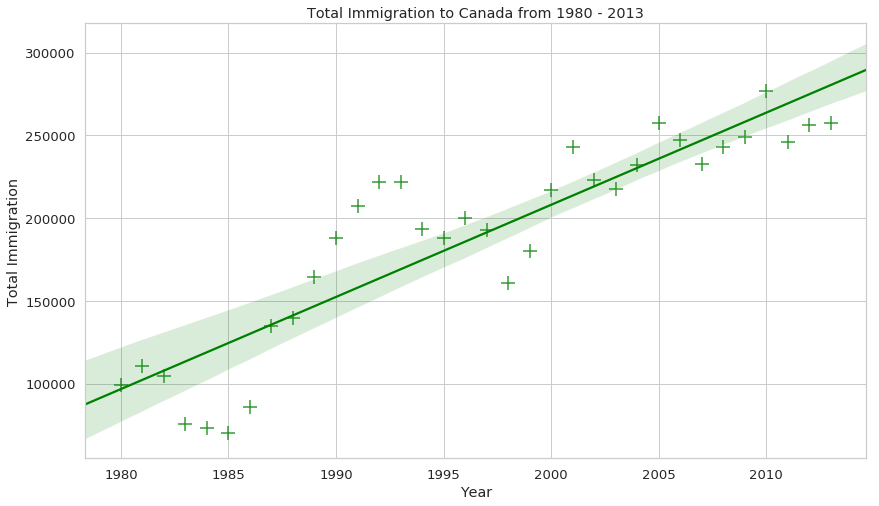

In [68]:
plt.figure(figsize=(14, 8))

sns.set(font_scale=1.2)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Double-click __here__ for some learnings
<!-- The correct answer is:
\\

**Learnings**
Map function can be used to apply a function (including in-built and lambda functions) to all elements in a list

Using print function in a notebook cell is recommended for iterables like list because when using print, there isn't a newline after each element of the list

Pandas plots the indices on the x-axis and the columns as individual lines on the y-axis in a line graph. So if there are multiple lines to be plotted, then each line's data should be in a column, not a row

The xlim parameter can be used to dictate the bounds of the x axis (in case we want padding on either ends, it can be done using the xlim parameter)

Markdown Formatted:

### Learnings
* **map** function can be used to apply a function (including in-built and lambda functions) to all elements in a list
* Using print function in a notebook cell is recommended for iterables like list because when using print, there isn't a newline after each element of the list
* **pandas** plots the indices on the x-axis and the columns as individual lines on the y-axis in a line graph. So if there are multiple lines to be plotted, then each line's data should be in a column, not a row
* The **xlim** parameter can be used to dictate the bounds of the x axis (in case we want padding on either ends, it can be done using the xlim parameter)

df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
-->